 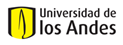
 
 # PROYECTO FINAL
 

## DEEP LEARNING Y REDES NEURONAL (MIIA-4406)

### Erika Marcela Angel Gordillo -201620012

### Camilo E. Prada Ladino -201021153

## Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics)-MIIA




# Movie Genre Classification (text)
Evaluation

1. 10% Create a solution using both images and text with a Machine Learning algorithm

2. 40% Create a solution using both images and text with a Deep Learning algorithm (CNN, transfer learning, RNN)

3. 30% Presentation (5 slides)

4. 20% Performance in the Kaggle competition (Normalized acording to class performance in the private leaderboard)

Before we start to develop the proposal goals for this activity, we have to make the data treatment for apply the solutions.

In [161]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Read Data

At this point we load the data, avaliable in kaggle.

In [162]:
path = 'C:/Users/camil/Documents/GitHub'

In [163]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [164]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [165]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


As we can see, the training data has the column "genre" which is our y variable. 

# Create count vectorizer with ngrams

Now we gonna part the data in the colummn "plot" to use this as our x´s variables. We use the count vectorice with 2 grams and we put a threshold of a thousand words of limit.

In [166]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [167]:
print(vect.get_feature_names()[:50])

['able', 'able to', 'about', 'about the', 'about to', 'accident', 'across', 'act', 'action', 'actually', 'affair', 'after', 'after the', 'again', 'against', 'against the', 'age', 'agent', 'ago', 'alex', 'alive', 'all', 'all of', 'all the', 'alone', 'along', 'along the', 'along with', 'already', 'also', 'although', 'always', 'america', 'american', 'among', 'an', 'an old', 'and', 'and has', 'and he', 'and her', 'and his', 'and is', 'and she', 'and that', 'and the', 'and their', 'and then', 'and they', 'and when']


In this part we can see the last fifty of them.

# Create y

Now we procced to create our y variable, for this task we gonna use the column "genres" of our data Training set. 

We gonna label the diferent categories of "genres" present in the set

In [168]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])


# Split train and test

Finally once we define our Y and X´s varibles, we split the data in train and test to fulfill the goals of the task.

In [169]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

# Train multi-class multi-label model

This model was included as a example for the activity, we integrated this to our solution as a benchmark for our own model.

In [170]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [171]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [172]:
y_pred_genres = clf.predict_proba(X_test)

In [173]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7437754044790014

This is the AUC for the example model, this result is our benchmark and we gonna try to do a better job applying another Machine Learning Algorithm.

# 1. Solution Text Machine Learning Algorithm (Multinomial NB)

To achieve a better accuracy than the example model we tried diferent types of algoritms such as SVC, Extra Trees Classifier, Mult Label Binarizer and MultinomialNB. Despite this iteration of models we only include the solution of the Multinomial NB as solution, we chosse this algoritm because achieve a better AUC than the example model.  

In [174]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.naive_bayes import MultinomialNB

In [175]:
clf1 = OneVsRestClassifier(MultinomialNB(alpha=1))

In [176]:
clf1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None, fit_prior=True),
          n_jobs=1)

In [177]:
y_pred_genres = clf1.predict_proba(X_test)

In [178]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7912870257354809

The AUC 0.79 of this solution is better than the 0.74 of the example.

In [179]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf1.predict_proba(X_test_dtm)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_RF.csv', index_label='ID')

# 2. Solution Test Deep Learning Algoritm

For this goal of the task asigned we gonna apply a NN, first at all we have to make the activity than in the number one point of create y, x´s and split in train and test. This time the x_dtm is not limited to 1000 like in the ML Algorthm because we have better result with this condition.

In [215]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten

vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 446896)

In [216]:
y_genres.shape

(7895, 24)

In [217]:
X1_train, X1_test, y1_train_genres, y1_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=13)

In [218]:
X1_train.shape

(5289, 446896)

In [219]:
X1_test.shape

(2606, 446896)

In [220]:
y1_train_genres.shape

(5289, 24)

In [239]:
y1_test_genres.shape

(2606, 24)

# Create the NN

Now than we already have the Y and X´s for our algorithm we configurate a NN with the imputs of the vectorized words and the units gonna be 24 for the categories of the "genres" in the training, we build two levels for this network the first has a "relu" activation function, and the second level have a "softmax" activation function. 


In [232]:
model = Sequential()
model.add(Dense(units=24, input_shape=X_dtm.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))   
model.add(Dense(units=24, input_dim=1))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                10725528  
_________________________________________________________________
activation_6 (Activation)    (None, 24)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24)                96        
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 24)                600       
_________________________________________________________________
activation_7 (Activation)    (None, 24)                0         
Total params: 10,726,224
Trainable params: 10,726,176
Non-trainable params: 48
_______________________________________________________________

In [233]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In the learning process of our network we use a categorical crossentroploss as loss funtion, and we optimizer used is a rms prop. The  parameters for the construcction and learning process of the network were chossen by a iterative procces lookin for a better AUC than the one achieve  by the example model.

In [234]:
model.fit(X1_train, y1_train_genres, epochs=10, verbose = 2)

Epoch 1/10
 - 52s - loss: 8.2249 - acc: 0.1755
Epoch 2/10
 - 52s - loss: 7.3044 - acc: 0.2770
Epoch 3/10
 - 53s - loss: 6.9474 - acc: 0.2834
Epoch 4/10
 - 50s - loss: 6.7042 - acc: 0.3095
Epoch 5/10
 - 51s - loss: 6.5488 - acc: 0.3250
Epoch 6/10
 - 53s - loss: 6.4513 - acc: 0.3263
Epoch 7/10
 - 51s - loss: 6.3578 - acc: 0.3409
Epoch 8/10
 - 56s - loss: 6.3178 - acc: 0.3343
Epoch 9/10
 - 54s - loss: 6.2620 - acc: 0.3509
Epoch 10/10
 - 50s - loss: 6.2012 - acc: 0.3555


In [235]:
y1_pred_genres = model.predict_proba(X1_test)
roc_auc_score(y1_test_genres, y1_pred_genres, average='macro')

0.8118747790772268

Finally once we evaluate the network, we find a AUC of 0.81. In kaggle the score was 0.80544 ang was the best score for the group.

In [241]:
X1_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y1_pred_test_genres =  model.predict_proba(X1_test_dtm)

pd.DataFrame(y1_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text1_RF.csv', index_label='ID')